Creates individual json files that are read by Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [16]:
from EEG_utils.EEG_utils_Siena import *

In [17]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\siena-scalp-eeg\\1.0.0\\"

# Avoid PN00-3 (crisis ends after the end of the record...)

patient_id = "PN00"
record_id = "5"

num_points = 300
num_node_features = 5

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN00\PN00-5.edf...
EDF file detected
Setting channel info structure...


Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


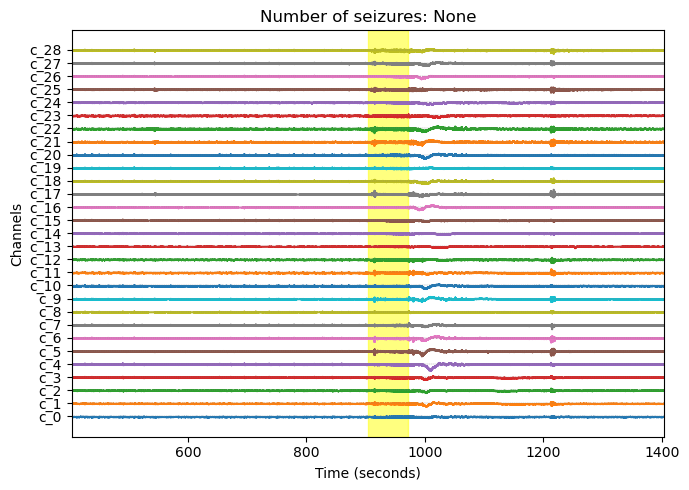

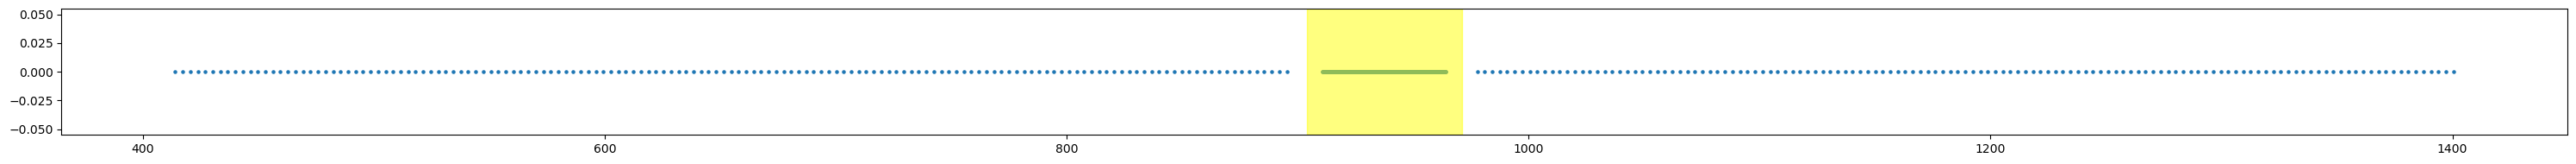

Creating graphs...
k: 5120 ---> t: 414.0 (seizure class: 0)
k: 6785 ---> t: 417.251953125 (seizure class: 0)
k: 8450 ---> t: 420.50390625 (seizure class: 0)
k: 10115 ---> t: 423.755859375 (seizure class: 0)
k: 11780 ---> t: 427.0078125 (seizure class: 0)
k: 13445 ---> t: 430.259765625 (seizure class: 0)
k: 15110 ---> t: 433.51171875 (seizure class: 0)
k: 16775 ---> t: 436.763671875 (seizure class: 0)
k: 18440 ---> t: 440.015625 (seizure class: 0)
k: 20105 ---> t: 443.267578125 (seizure class: 0)
k: 21770 ---> t: 446.51953125 (seizure class: 0)
k: 23435 ---> t: 449.771484375 (seizure class: 0)
k: 25100 ---> t: 453.0234375 (seizure class: 0)
k: 26765 ---> t: 456.275390625 (seizure class: 0)
k: 28430 ---> t: 459.52734375 (seizure class: 0)
k: 30095 ---> t: 462.779296875 (seizure class: 0)
k: 31760 ---> t: 466.03125 (seizure class: 0)
k: 33425 ---> t: 469.283203125 (seizure class: 0)
k: 35090 ---> t: 472.53515625 (seizure class: 0)
k: 36755 ---> t: 475.787109375 (seizure class: 0)
k: 38420

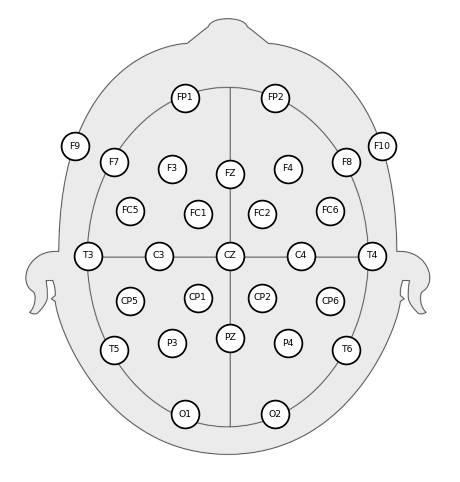

In [18]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=num_node_features)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [19]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 25/03/2025, ore 09:42


In [20]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)